# Use mdtraj in a jupyter notebook to compute the phi and psi dihedral angles

In [98]:
# import libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

In [99]:
# load the trajectory from ../Inputs
traj = md.load('../Inputs/adp_T300.trr', top='../Inputs/adp_T300.gro')

# check the trajectory
print(traj)
print(traj.topology)
print(traj.time[-1]/1000,"ns")
print(traj.time.shape)
print(traj.n_frames)


<mdtraj.Trajectory with 5001 frames, 22 atoms, 3 residues, and unitcells>
<mdtraj.Topology with 1 chains, 3 residues, 22 atoms, 21 bonds>
5.0 ns
(5001,)
5001


In [100]:
# compute phi and psi angles
# ref: https://www.mdtraj.org/1.9.8.dev0/api/generated/mdtraj.compute_phi.html
# ref: https://www.mdtraj.org/1.9.8.dev0/api/generated/mdtraj.compute_psi.html
phi_angles = md.compute_phi(traj, periodic=True)
psi_angles = md.compute_psi(traj, periodic=True)

# check the value of phi
print("phi\n",phi_angles)
print("phi[0]\n",phi_angles[0])
print("phi[1]\n",phi_angles[1])
# print("phi[2]\n",phi[2])              # IndexError: tuple index out of range--- means that there's no phi[2]
print("phi[1].shape\n",phi_angles[1].shape)

# check the values of psi
print("-----------------------------------------------")
print("psi\n",psi_angles)
print("psi[0]\n",psi_angles[0])
print("psi[1]\n",psi_angles[1])
# print("phi[2]\n",psi[2])              # IndexError: tuple index out of range--- means that there's no psi[2]
print("psi[1].shape\n",psi_angles[1].shape)


phi
 (array([[ 4,  6,  8, 14]]), array([[-2.8562374],
       [-1.1062285],
       [-1.5958953],
       ...,
       [-1.4030793],
       [-1.4471011],
       [-1.4509261]], dtype=float32))
phi[0]
 [[ 4  6  8 14]]
phi[1]
 [[-2.8562374]
 [-1.1062285]
 [-1.5958953]
 ...
 [-1.4030793]
 [-1.4471011]
 [-1.4509261]]
phi[1].shape
 (5001, 1)
-----------------------------------------------
psi
 (array([[ 6,  8, 14, 16]]), array([[2.791988  ],
       [0.38506147],
       [0.6579727 ],
       ...,
       [0.7961541 ],
       [1.2627339 ],
       [1.2898009 ]], dtype=float32))
psi[0]
 [[ 6  8 14 16]]
psi[1]
 [[2.791988  ]
 [0.38506147]
 [0.6579727 ]
 ...
 [0.7961541 ]
 [1.2627339 ]
 [1.2898009 ]]
psi[1].shape
 (5001, 1)


In [101]:
# According to the last cell, it is clear that for each of 5001 frames, 
# there is only one phi dihedral angle and one psi dihedral angles

time = traj.time
phi = phi_angles[1][:,0]
psi = psi_angles[1][:,0]
print(time)
print(phi)


[0.000e+00 1.000e+00 2.000e+00 ... 4.998e+03 4.999e+03 5.000e+03]
[-2.8562374 -1.1062285 -1.5958953 ... -1.4030793 -1.4471011 -1.4509261]


# Make a plot of phi vs time and psi vs time.

Plot saved: ../Figures/ADP_phi_psi_DihedralAngles_VS_Time.pdf


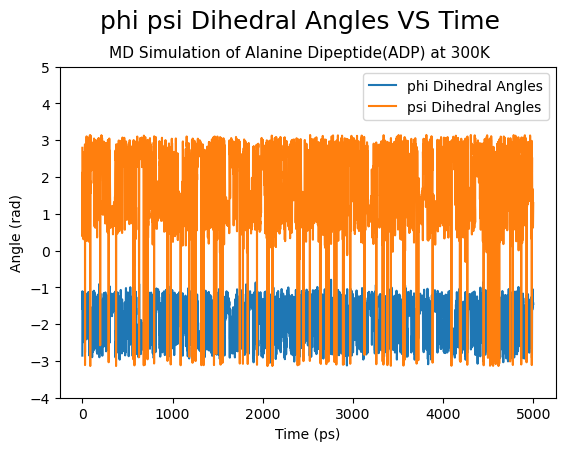

In [102]:
# Make a plot of phi vs time and psi vs time.
fig=plt.figure(1)
plt.plot(time, phi, label= "phi Dihedral Angles")           #plot phi vs time
plt.plot(time, psi, label= "psi Dihedral Angles")           #plot psi vs time
plt.legend()                     
# set all labels
plt.xlabel('Time (ps)')
plt.ylabel('Angle (rad)')
#plt.title('phi_psi_DihedralAngles_VS_Time')
plt.text(x=0.5, y=0.88, s="phi psi Dihedral Angles VS Time", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "MD Simulation of Alanine Dipeptide(ADP) at 300K", fontsize=11, ha="center", transform=fig.transFigure)
# adjust 
plt.subplots_adjust(top=0.8, wspace=0.3)
plt.ylim(-4,5)
# save figure
plt.savefig("../Figures/ADP_phi_psi_DihedralAngles_VS_Time.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_phi_psi_DihedralAngles_VS_Time.pdf")
plt.show()

# Make a free energy surface in phi, psi space from this data. 
### In otherwords, compute a 2d histogram of the phi, psi data and plot the -log(histogram), nicely labeled, with a colorbar, etc

In [103]:
# compute free energy
H, xedges, yedges = np.histogram2d(phi, psi, bins=100)
# print(xedges)
print(H)
H = -np.log(H)
H -= np.min(H)
# Histogram does not follow Cartesian convention,therefore transpose H for visualization purposes.
H = H.T
print(H)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 ...
 [3.09104245        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]
 [       inf        inf        inf ...        inf        inf        inf]]


/state/partition1/job-25966850/ipykernel_2301014/844273473.py:5: RuntimeWarning: divide by zero encountered in log
  H = -np.log(H)


Plot saved: ../Figures/ADP_Free_Energy_Surface_T300.pdf


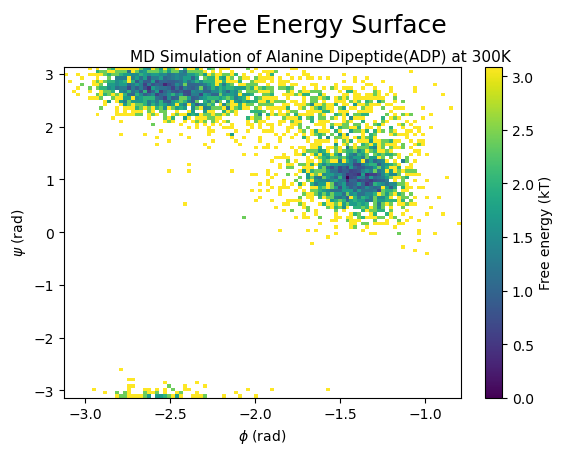

In [104]:
# plot free energy
#plt.interpolation='nearest',origin='lower',extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]])
plt.pcolormesh(xedges, yedges, H)
#plt.imshow(H, extent=[xedges[0],xedges[-1],yedges[0],yedges[-1]])
plt.xlabel('$\phi$ (rad)')
plt.ylabel('$\psi$ (rad)')
colorbar = plt.colorbar()
colorbar.set_label('Free energy (kT)')
#plt.show()

#plt.title('phi_psi_DihedralAngles_VS_Time')
plt.text(x=0.5, y=0.88, s="Free Energy Surface", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "MD Simulation of Alanine Dipeptide(ADP) at 300K", fontsize=11, ha="center", transform=fig.transFigure)
# adjust 
plt.subplots_adjust(top=0.8, wspace=0.3)
# save figure
plt.savefig("../Figures/ADP_Free_Energy_Surface_T300.pdf",format="pdf")
print("Plot saved: ../Figures/ADP_Free_Energy_Surface_T300.pdf")
plt.show()